In [41]:
data_folder = './data'

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from preprocessing import rename_columns, replace_with_nan

In [44]:
employed_by_sex_districts = replace_with_nan(rename_columns(pd.read_csv(f'{data_folder}/RV_O_047_L_OK_SK.CSV', delimiter=';')))
employed_by_sex_regions = replace_with_nan(rename_columns(pd.read_csv(f'{data_folder}/RV_O_047_R_KR_SK.CSV', delimiter=';')))
employed_by_sex_economical_regions = replace_with_nan(rename_columns(pd.read_csv(f'{data_folder}/RV_O_047_R_OL_SK.CSV', delimiter=';')))
employed_by_sex_slovakia = replace_with_nan(rename_columns(pd.read_csv(f'{data_folder}/RV_O_047_R_SR_SK.CSV', delimiter=';')))

population_by_sex_slovakia = replace_with_nan(rename_columns(pd.read_csv(f'{data_folder}/RV_O_010_R_SR_SK.CSV', delimiter=';')))


In [52]:
employed_by_sex_districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346464 entries, 0 to 346463
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   LAU1_CODE          346464 non-null  object
 1   district name      346464 non-null  object
 2   sex                346464 non-null  object
 3   5-year age groups  346464 non-null  object
 4   education          335993 non-null  object
 5   ISCO occupation    318633 non-null  object
 6   count              346464 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 18.5+ MB


In [47]:
employee_by_age = employed_by_sex_slovakia.groupby('5-year age groups')['count'].sum()

In [49]:
sex_sk = population_by_sex_slovakia[population_by_sex_slovakia['economical age groups'] != 'predproduktívny vek (0-14 rokov)'].groupby(
    'sex')['count'].sum()

sex_emplyee_sk = employed_by_sex_slovakia.groupby('sex')['count'].sum()

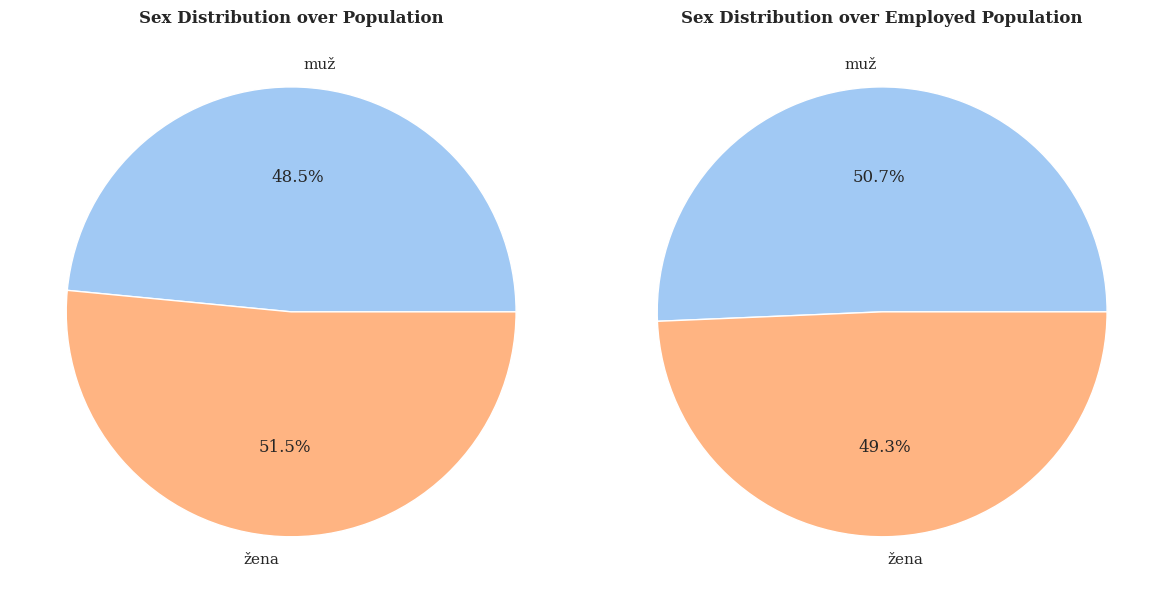

In [50]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.rcParams['font.family'] = 'serif'
colors = sns.color_palette('pastel')[:2]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(x=sex_sk.values, labels=sex_sk.index, autopct='%1.1f%%', colors=colors)
axes[0].set_title('Sex Distribution over Population', fontweight='bold')

axes[1].pie(x=sex_emplyee_sk.values, labels=sex_emplyee_sk.index, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Sex Distribution over Employed Population', fontweight='bold')

plt.tight_layout()
plt.show()

In [109]:
table = employed_by_sex_slovakia.groupby(['sex', 'education'])['count'].sum()
df = table.reset_index()
df.columns = ['Sex', 'education', 'Count']

male_data = df[df['Sex'] == 'muž']
female_data = df[df['Sex'] == 'žena']

male_data = df[df['Sex'] == 'muž']
female_data = df[df['Sex'] == 'žena']

combined_data = pd.concat([male_data, female_data])

combined_data = combined_data.sort_values(by=['education', 'Sex'])

fig = px.bar(combined_data,
             x='Count',
             y='education',
             color='Sex',
             orientation='h',
             barmode='group',
             title='Count of Work Occupation by Gender',
             labels={'Count': 'Count', 'education': 'education', 'Sex': 'Gender'},
             color_discrete_map={'muž': 'blue', 'žena': 'pink'})

fig.update_traces(marker=dict(line=dict(width=1, color='grey')))

fig.update_yaxes(categoryorder='total ascending')

fig.update_layout(showlegend=True, legend_title_text='Gender', width=1300, height=1000)


fig.show()

In [108]:
table = employed_by_sex_slovakia.groupby(['sex', 'ISCO occupation'])['count'].sum()
df = table.reset_index()
df.columns = ['Sex', 'ISCO occupation', 'Count']

male_data = df[df['Sex'] == 'muž']
female_data = df[df['Sex'] == 'žena']

male_data = df[df['Sex'] == 'muž']
female_data = df[df['Sex'] == 'žena']

combined_data = pd.concat([male_data, female_data])

combined_data = combined_data.sort_values(by=['ISCO occupation', 'Sex'])

fig = px.bar(combined_data,
             x='Count',
             y='ISCO occupation',
             color='Sex',
             orientation='h',
             barmode='group',
             title='Count of Work Occupation by Gender',
             labels={'Count': 'Count', 'ISCO occupation': 'ISCO Occupation', 'Sex': 'Gender'},
             color_discrete_map={'muž': 'blue', 'žena': 'pink'})

fig.update_traces(marker=dict(line=dict(width=1, color='grey')))

fig.update_yaxes(categoryorder='total ascending')

fig.update_layout(showlegend=True, legend_title_text='Gender', width=1200, height=1000)


fig.show()